# Métodos numéricos para la valoración de opciones

In [2]:
import numpy as np
from matplotlib import pyplot as plt

**Simulación de trayectoria**

In [4]:
# Parametros
N = 200
dt = 1/512
mu = 0.05
sg = 0.3
B = np.zeros(N)
# Condicion inicial
X0 = 10

In [6]:
B[0] = 0
for i in range(1,N):
    B[i] = B[i-1] - np.sqrt(dt)*np.random.normal()
X = np.zeros(N)
X[0] = X0
for i in range(1,N):
    X[i] = X[i-1] + mu*X[i-1]*dt + sg*X[i-1]*(B[i] - B[i-1])

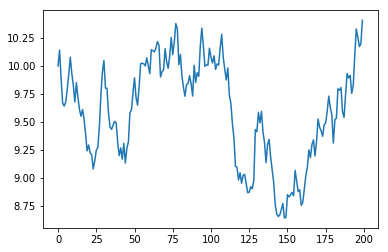

In [8]:
plt.plot(X)
plt.show()

In [10]:
R = np.zeros(N)
# Retornos instantáneos
for j in range(1,N):
        R[j-1] = (X[j] - X[j-1])/X[j-1]

In [11]:
dt = 1/len(R)
media = np.mean(R)
varianza = np.var(R)
mu = media/dt
sigma = varianza/dt
print('mu: '+str(mu)+'\n'+'sigma: '+str(sigma))

mu: 0.05899501705741507
sigma: 0.0382965805155952


**Precio de ejercicio**

In [31]:
k = 1000 # Numero de trayectorias
T = 40 # Periodo de maduración
S = np.zeros((k,T))
for i in range(k):
    S[i,0] = X[-1]
for i in range(k):
    for j in range(1,T):
        S[i,j] = S[i, j-1] + mu*S[i, j-1]*dt + sigma*S[i,j-1]*np.sqrt(dt)*np.random.normal()

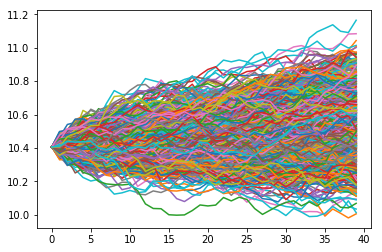

In [37]:
plt.plot(np.matrix(S).T)
plt.show()

In [35]:
K = 9 # Precio de ejercicio

## Simulación Montecarlo

In [61]:
S0 = X[-1]
r = 0.05 # La tasa de interes libre de riesgo
n = 300
dt = (N+T)/n
for i in range(k):
    for j in range(1,T):
        S[i,j] = S[i, j-1] + r*S[i, j-1]*dt + sigma*S[i,j-1]*np.sqrt(dt)*np.random.normal()

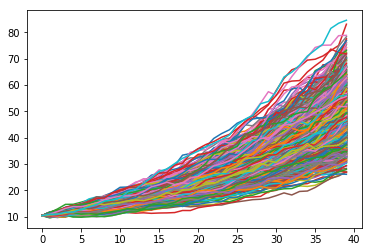

In [62]:
plt.plot(np.matrix(S).T)
plt.show()

**Payoff**

In [63]:
pa = np.zeros(k)
for i in range(k):
    pa[i] = np.maximum(S[i,-1]-K,0)

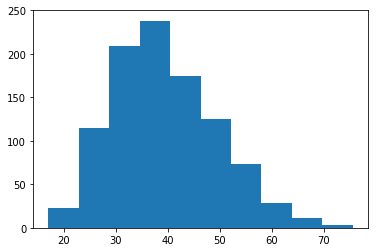

In [64]:
plt.hist(pa)
plt.show()

In [65]:
media = np.mean(pa)
opcion = np.exp(-r*(T+N))*media
print(opcion)

0.00024197750151603973
